In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src import *
import networkx as nx
from scipy.stats import beta
import time

In [3]:
G = nx.karate_club_graph()

A = nx.adjacency_matrix(G, weight=None)
n = np.size(A, axis=0)

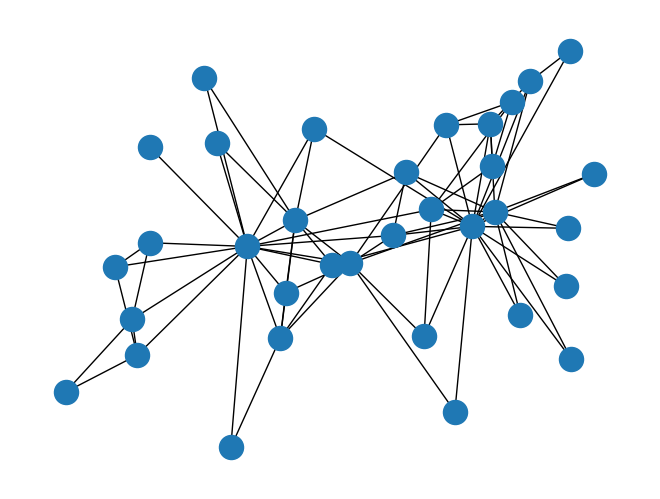

In [4]:
nx.draw(G)

In [5]:
save_data = False

In [6]:
s0 = np.zeros(n)
p_s = 1
s0[list(random.sample(range(n), int(p_s * n)))] = 1

alpha = 0
gamma = 0.1
b = 0.1

contagion_function = lambda nu, b: 1 - (1 - b) ** nu
c = contagion_function(np.arange(n), b)

x = contagion_process(A, gamma, c, s0, tmin=0, tmax=100, random_seed=None)

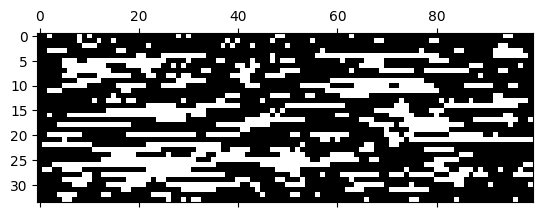

In [7]:
plt.spy(x.T)

In [8]:
import cProfile

In [9]:
p_c = np.ones((2, n))

p_rho = [2, 5]

rho0 = beta(p_rho[0], p_rho[1]).rvs()
print(rho0)

A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))

samples, l = infer_adjacency_matrix(
    x, A0, p_rho, p_c, nsamples=100, burn_in=10000, skip=100, return_likelihood=True
)

0.4552397106259011


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUse of unsupported NumPy function 'numpy.size' or unsupported use of the function.
[1m
File "src/inference.py", line 129:[0m
[1mdef count_all_infection_events(x, A):
[1m    T = np.size(x, axis=0)
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: typing of get attribute at /Users/nicholaslandry/Documents/GitHub/modeling-and-inferring-complex-contagion/src/inference.py (129)[0m
[1m
File "src/inference.py", line 129:[0m
[1mdef count_all_infection_events(x, A):
[1m    T = np.size(x, axis=0)
[0m    [1m^[0m[0m


In [ ]:
plt.plot(l)

In [ ]:
p = np.mean(samples, axis=0)
plt.subplot(121)
plt.imshow(p, cmap="viridis", vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(A.todense(), vmin=0, vmax=1)

In [ ]:
samples = 1000

gamma = np.zeros(samples)
c_samples = np.zeros((samples, n))

p_rho = np.array([1, 1])
p_gamma = np.array([1, 1])
p_c = np.ones((2, n))

for i in range(1000):
    g, b = infer_dynamics(x, A, p_gamma, p_c)
    gamma[i] = g
    c_samples[i] = b

In [ ]:
plt.figure()
plt.subplot(211)
plt.title(r"$\gamma$")
plt.hist(gamma, bins=100)

plt.subplot(212)
plt.title(r"$\mathbf{c}$")
plt.plot(np.mean(c_samples, axis=0))
plt.xlabel(r"$\nu$")
plt.plot(c)

plt.tight_layout()
plt.show()